<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Recomendando Música

El objetivo de este caso-taller es construir un sistema de recomendación de Música utilizando los datos de [Last.fm](https://www.last.fm/) provistos  abiertamente por [grouplens](https://grouplens.org/about/what-is-grouplens/) para: **"avanzar la teoría y la práctica de la computación social mediante la construcción y la comprensión de sistemas *(de recomendación)* utilizados por personas reales".**

Los datos contienen información sobre artistas, usuarios, y las veces que estos escucharon sus canciones. Las bases se encuentran en los `Archivos de Laboratorio` en la carpeta `data`, allí también está disponible un archivo [README](data/readme.txt) que contiene más información sobre las bases.


## Instrucciones generales

1. Para desarrollar el *cuaderno*, primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "Revisión por el compañero".

4. El archivo entregado debe poder ser ejecutado localmente por los pares. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

En la carpeta `data` se encuentran los archivos:

   - `artists.dat`  que contienen el identificador del artista (`id`), nombre (`name`), link a la página del artista en last.fm (`url`), y link a la imagen del usuario (`pictureURL`), vale aclarar que varios de estos links están rotos. 
   - `user_artists.dat`  que contiene identificador del usuario (`userID`), nombre del artista que escuchó (`artistID`), y las veces que los escuchó (`weight`).

Cargue estos datos en su *cuaderno*:

   1. Para la base de artistas seleccione las columnas de identificador de artista (`id`) y nombre (`name`). Renombre estas columnas para poder hacer la unión con la base `user_artists.dat`.
   2. Para la base de usuarios y artistas, renombre las columnas de forma tal que se mantenga la consistencia para unir con la base anterior, y renombre la columna `weight` a `nro_reproducciones`.
   3. Una estas bases.
   

In [1]:
# Utilice este espacio para escribir el código.
import pandas as pd

# Ruta a los archivos
path_artists = 'data/artists.dat'
path_user_artists = 'data/user_artists.dat'

# Cargar los datos de artistas
# Ajusta el delimitador según el formato real de tus archivos, aquí se usa '\t' para tabulaciones
artists = pd.read_csv(path_artists, delimiter='\t')

artists.head(5)

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


In [2]:
user_artists = pd.read_csv(path_user_artists, delimiter='\t')
user_artists.head(5)

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [3]:
artists = artists[['id', 'name']]
artists.columns = ['artistID', 'name']
 
user_artists.columns = ['userID', 'artistID', 'nro_reproducciones']

In [4]:
user_artists_c=pd.merge(user_artists, artists, on='artistID')

user_artists_c.head(5)

,userID,artistID,nro_reproducciones,name
0,2,51,13883,Duran Duran
1,4,51,228,Duran Duran
2,27,51,85,Duran Duran
3,28,51,10,Duran Duran
4,62,51,528,Duran Duran


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 2. Análisis preliminar. 

En esta sección exploraremos la base. Para ello responda las siguientes preguntas.

#### 2.1 ¿Cuantos usuarios y artistas hay en la base?


In [5]:
num_user = user_artists_c['userID'].nunique()
num_artists = user_artists_c['artistID'].nunique()

total_artists= artists['artistID'].nunique()

print(f"El numero de usuarios es: {num_user}")
print(f"El numero de artistas escuchados es: {num_artists}")
print(f"El numero total de artistas es: {total_artists}")

El numero de usuarios es: 1892
El numero de artistas escuchados es: 17632
El numero total de artistas es: 17632



#### 2.2 ¿Cuáles es la distribución de probabilidad del consumo por artista? (haga el calculo sin ponderar y ponderando por el numero de reproducciones) ¿Qué podemos inferir a partir de la comparación de ambas?

In [6]:
# Utilice este espacio para escribir el código.


# DISTRIBUCION DE PROBABILIDAD SIN PONDERAR

# Num usuarios x artista
user_x_artist = user_artists_c.groupby('artistID').size()

# Distribución de probabilidad sin ponderar (num usuarios que escuchan al artista/num total de usuarios)
probabilidad = user_x_artist / user_x_artist.sum()


In [7]:
# DISTRIBUCION DE PROBABILIDAD PONDERADA

#Suma de reproducciones x artista
repro_x_artist = user_artists_c.groupby('artistID')['nro_reproducciones'].sum()

# Distribución de probabilidad ponderada (num total de reproducciones del artista/num total de reproducciones)
probabilidad_pond = repro_x_artist / repro_x_artist.sum()


In [8]:
distribucion_df = pd.DataFrame({'Promedio_users': probabilidad,
                                'Promedio_repro': probabilidad_pond}).fillna(0) 

print("Distribución de probabilidad sin ponderar y ponderada:")
print(distribucion_df.head(18))

Distribución de probabilidad sin ponderar y ponderada:
          Promedio_users  Promedio_repro
artistID                                
1               0.000032        0.000011
2               0.000129        0.000116
3               0.000032        0.000011
4               0.000022        0.000008
5               0.000022        0.000013
6               0.000108        0.000073
7               0.001433        0.001391
8               0.000129        0.000156
9               0.000259        0.000139
10              0.000097        0.000059
11              0.000065        0.000029
12              0.000205        0.000138
13              0.000108        0.000034
15              0.000280        0.000130
16              0.000086        0.000020
17              0.000065        0.000026
18              0.000108        0.000055
19              0.000140        0.000126


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 2.3 Para el usuario 8 (`userID==8`) ¿cuál es la distribución de reproducción de artistas basado en el número de reproducciones relativas?. Presente sus resultados usando tablas y/o gráficas. ¿Encuentra algún patrón en los artistas que escucha y las veces que reproduce? ¿Podemos decir algo de sus preferencias?


In [9]:
# Utilice este espacio para escribir el código.
import matplotlib.pyplot as plt

data_u = user_artists_c[user_artists_c['userID']==8]

data_u['reproducciones relativas'] = (data_u['nro_reproducciones']*100) / (data_u['nro_reproducciones'].sum())
data_u = data_u.sort_values(by='reproducciones relativas', ascending=False)

C:\Users\User\AppData\Local\Temp\ipykernel_2916\473494976.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_u['reproducciones relativas'] = (data_u['nro_reproducciones']*100) / (data_u['nro_reproducciones'].sum())


El numero de artistas que escucha el usuario 8 es: 50
El numero total de reproducciones de usuario 8 es: 36279


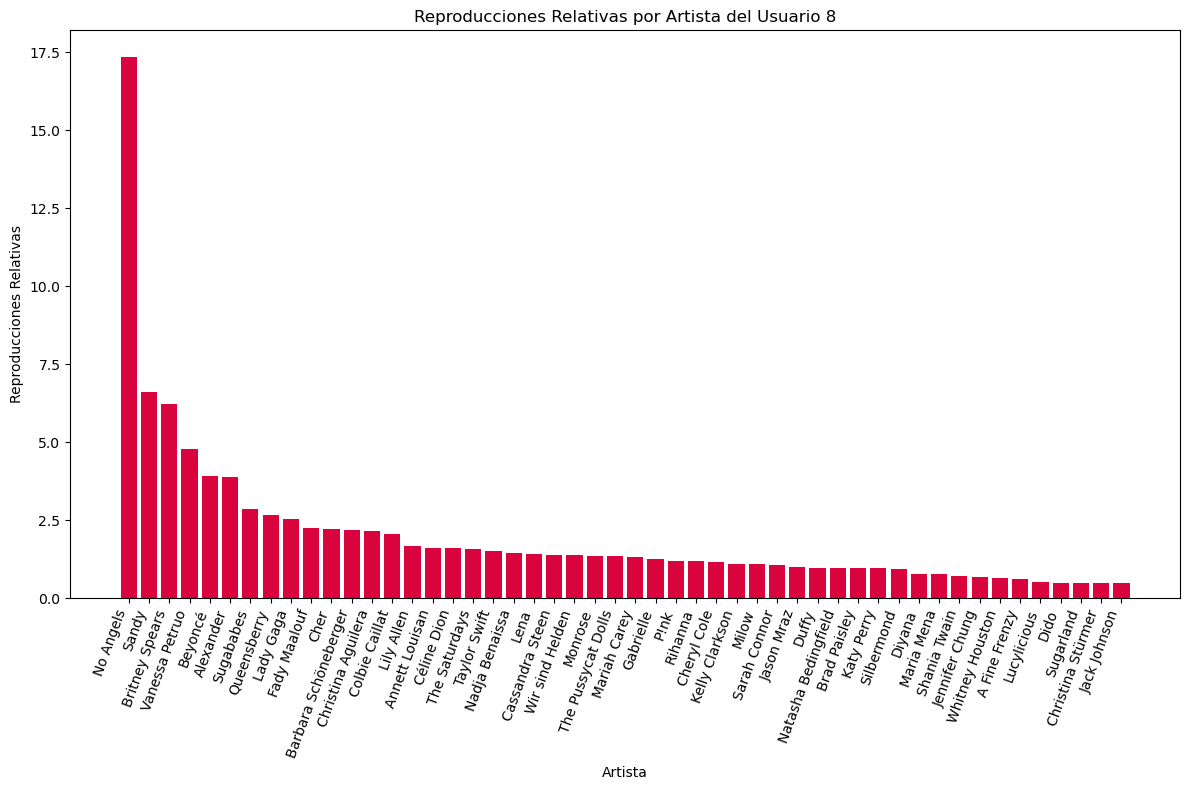

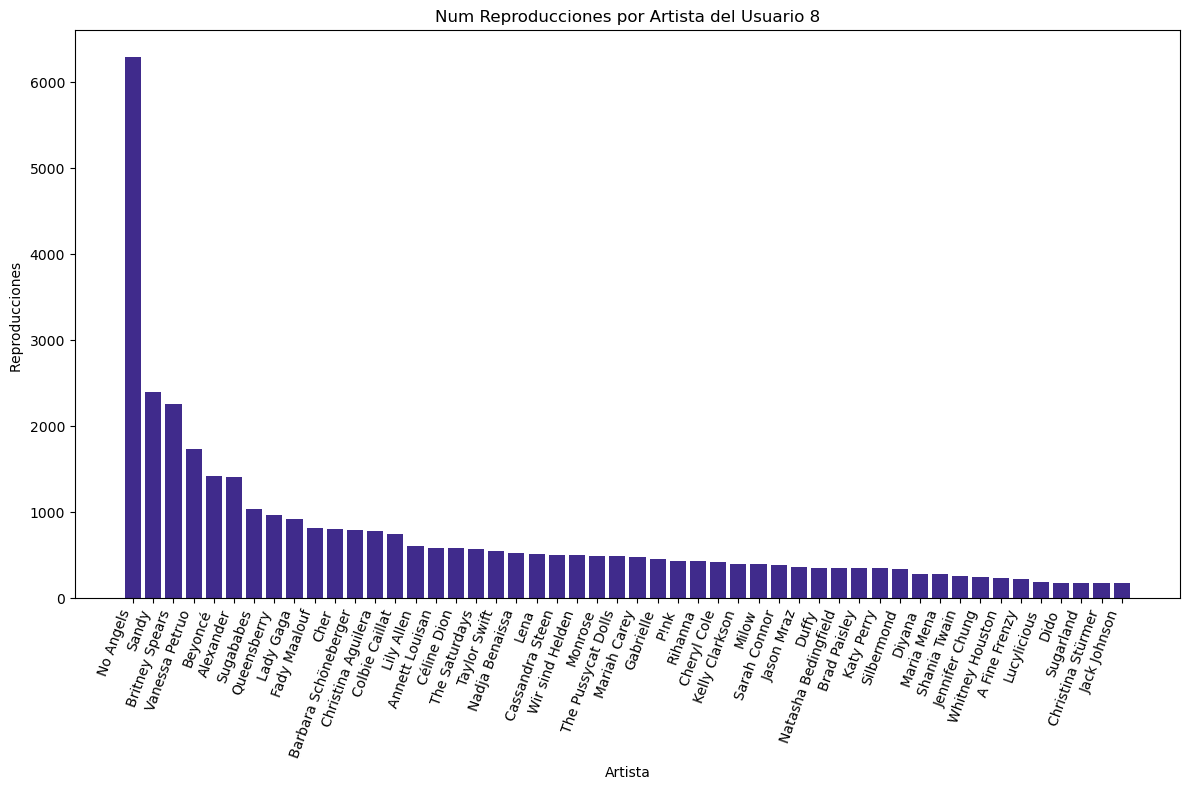

In [10]:
print("El numero de artistas que escucha el usuario 8 es:",  data_u['artistID'].nunique())
print("El numero total de reproducciones de usuario 8 es:",  data_u['nro_reproducciones'].sum())

plt.figure(figsize=(12, 8))
plt.bar(data_u['name'], data_u['reproducciones relativas'], color='#D9043D')
plt.xlabel('Artista')
plt.ylabel('Reproducciones Relativas')
plt.title('Reproducciones Relativas por Artista del Usuario 8')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
plt.bar(data_u['name'], data_u['nro_reproducciones'], color='#402B8C')
plt.xlabel('Artista')
plt.ylabel('Reproducciones ')
plt.title('Num Reproducciones por Artista del Usuario 8')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 3. Generando Recomendaciones

En esta sección nos interesa generar recomendaciones ***nuevas y relevantes*** para el usuario 8 (`userID==8`). Para ello vamos a generar distintos sistemas de recomendación y comparar las recomendaciones generadas.

#### 3.1. Filtrado colaborativo sencillo: promedios simples.

Usando el promedio simple basado en el número de usuarios que escucha un artista (sin considerar el número de veces que estos usuarios reproducen al artista) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones.

In [11]:
# Utilice este espacio para escribir el código.

#Artistas que escucha el usuario 8, usando el dataframe ya creado en el punto 2.3
artistas_u8 = data_u['artistID'].unique()

# Usando el dataframe del punto 2.2 agremos los nombres de los artistas 
distribucion_df = pd.merge(distribucion_df, artists, on='artistID')

#Elimina los artistas que escucha el usuario 8
distribucion_df =distribucion_df[~distribucion_df['artistID'].isin(artistas_u8)]

# Organiza los artista por el promedio y recomienda el top 10
top_artists_df = distribucion_df.sort_values(by='Promedio_users', ascending=False).head(10)

top_artists_df


,artistID,Promedio_users,Promedio_repro,name
221,227,0.005171,0.009570,The Beatles
61,67,0.004621,0.013315,Madonna
327,333,0.004492,0.007601,Avril Lavigne
184,190,0.004309,0.007011,Muse
492,498,0.004298,0.013926,Paramore
148,154,0.004233,0.005569,Radiohead
59,65,0.003975,0.004781,Coldplay
460,466,0.003899,0.005556,Ke$ha
695,701,0.003436,0.009952,Shakira
300,306,0.003275,0.002727,Black Eyed Peas


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.2.  Filtrado colaborativo sencillo: promedios ponderados.

Usando el promedio ponderado basado en el número de usuarios que escucha un artista  y ponderando  por el número de veces que estos usuarios reproducen al artista (`nro_reproducciones`) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.


In [12]:
# Utilice este espacio para escribir el código.

#Calcula la ponderacion entre el promedio de usuarios por artista * el promedio de reproduciones por artista
distribucion_df['Ponderacion'] = distribucion_df['Promedio_users'] * distribucion_df['Promedio_repro']

top_artists_df = distribucion_df.sort_values(by='Ponderacion', ascending=False).head(10)

top_artists_df



,artistID,Promedio_users,Promedio_repro,name,Ponderacion
61,67,0.004621,0.013315,Madonna,0.000062
492,498,0.004298,0.013926,Paramore,0.000060
66,72,0.003038,0.018809,Depeche Mode,0.000057
221,227,0.005171,0.009570,The Beatles,0.000049
695,701,0.003436,0.009952,Shakira,0.000034
327,333,0.004492,0.007601,Avril Lavigne,0.000034
184,190,0.004309,0.007011,Muse,0.000030
148,154,0.004233,0.005569,Radiohead,0.000024
455,461,0.003081,0.007069,Miley Cyrus,0.000022
460,466,0.003899,0.005556,Ke$ha,0.000022


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.3.  Filtrado colaborativo sencillo: similitud de coseno.

Usando el promedio ponderado de reproducciones genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario. Para generar los pesos utilice la distancia de coseno. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.

In [13]:
import numpy as np

In [14]:
# Utilice este espacio para escribir el código.

# Total de reproducciones para cada usuario
nro_x_usuario = user_artists_c.groupby('userID')['nro_reproducciones'].transform('sum')

# Calculo del promedio ponderado de cada artista para cada usuario
user_artists_c['promedio_ponderado'] = user_artists_c['nro_reproducciones'] / nro_x_usuario

user_artists_c.head(5)

,userID,artistID,nro_reproducciones,name,promedio_ponderado
0,2,51,13883,Duran Duran,0.082276
1,4,51,228,Duran Duran,0.008466
2,27,51,85,Duran Duran,0.014814
3,28,51,10,Duran Duran,0.020040
4,62,51,528,Duran Duran,0.031693


In [15]:
r_matrix = user_artists_c.pivot_table(values='promedio_ponderado', index='userID', columns='artistID')
r_matrix_dummy = r_matrix.copy().fillna(0)
r_matrix_dummy
r_matrix_dummy.head()

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.metrics.pairwise import cosine_similarity

#Calculamos la similitud de coseno 
cosine_sim = cosine_similarity(r_matrix_dummy, r_matrix_dummy)

# Transformamos la matriz de similitud en un DataFrame
cosine_sim = pd.DataFrame(cosine_sim, index=r_matrix.index, columns=r_matrix.index)

cosine_sim

userID,2,3,4,5,6,7,8,9,10,11,...,2090,2091,2092,2093,2094,2095,2096,2097,2099,2100
userID,,,,,,,,,,,,,,,,,,,,,
2,1.000000,0.000000,0.144786,0.028692,0.007016,0.030219,0.008964,0.000000,0.000000,0.021267,...,0.000000,0.043405,0.000000,0.004625,0.001585,0.000000,0.000956,0.082134,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000318,0.000000
4,0.144786,0.000000,1.000000,0.081193,0.006609,0.000000,0.000000,0.000000,0.009072,0.013407,...,0.000000,0.000000,0.003776,0.006178,0.000000,0.000000,0.045125,0.659085,0.000000,0.000000
5,0.028692,0.000000,0.081193,1.000000,0.000000,0.000000,0.000000,0.000000,0.169078,0.004639,...,0.010993,0.000000,0.205141,0.000000,0.000000,0.000000,0.204557,0.119133,0.000000,0.000000
6,0.007016,0.000000,0.006609,0.000000,1.000000,0.012713,0.018881,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.067938
2096,0.000956,0.000000,0.045125,0.204557,0.000000,0.000000,0.000000,0.000000,0.057869,0.001784,...,0.006653,0.000000,0.056303,0.005927,0.000000,0.000000,1.000000,0.030837,0.000000,0.000000
2097,0.082134,0.000000,0.659085,0.119133,0.000000,0.000000,0.000000,0.000000,0.110738,0.000000,...,0.004548,0.022692,0.286443,0.000000,0.000000,0.000000,0.030837,1.000000,0.000000,0.000000


In [17]:
def cf_user_wmean(userID, artistID):
    
    # Primero verificamos si la película esta en la matriz
    if artistID in r_matrix:
        #Buscamos las medidas de similitud con los otros usuarios
        sim_scores = cosine_sim[userID]
        #print("sim scores :", sim_scores) # REMOVER
        # Obtenemos los promedios ponderados de reproducciones no faltantes de la matriz bajo evaluación
        m_prom_rep = r_matrix[artistID]
        #print("m_prom_rep :", m_prom_rep) # REMOVER
        # Obtenemos los índicies de los artistas sin promedio ponderado de reproducciones 
        idx = m_prom_rep[m_prom_rep.isnull()].index
        #print("idx sin pormedio ponderado de reproduccion :", idx) # REMOVER
        # Nos quedamos con similitudes y ratings completos
        sim_scores = sim_scores.drop(idx)
        #print("sim scores :", sim_scores) # REMOVER
        m_prom_rep = m_prom_rep.dropna()
        #print("m_prom_rep :", m_prom_rep) # REMOVER
        
        if sim_scores.sum()>0 :
            # Calculamos la media ponderada
            wmean_prom_rep = np.dot(sim_scores, m_prom_rep)/ sim_scores.sum()
        else:
            wmean_prom_rep = 0 
    else:
        # Si no tenemos ninguna información retornamos 3
        wmean_prom_rep = prom_rep_mean # calculado en 3.2
    
    return wmean_prom_rep

In [18]:
# calculo de user_wmean para todos los artistas
artists_c = artists.copy()
user_id = 8  

# Aplicar la función a cada artista
artists_c['cf_wmean_result'] = artists_c['artistID'].apply(lambda artistID: cf_user_wmean(user_id, artistID))

# Filtrar artistas que el usuario 8 ya ha escuchado
result_df = artists_c[~artists_c['artistID'].isin(artistas_u8)]


result_df = artists_c[['artistID', 'name', 'cf_wmean_result']]
result_df = result_df.sort_values(by='cf_wmean_result', ascending=False)

result_df.head(10)

,artistID,name,cf_wmean_result
11419,11818,The Saviorz,0.400000
2294,2309,Hande Yener,0.395151
2482,2497,IOSYS,0.356228
2286,2301,Ajda Pekkan,0.293379
9401,9634,Mono Inc.,0.280444
9466,9699,Joan Baez,0.271483
9863,10128,Matell,0.267037
8733,8966,Nina,0.263079
15888,16760,Gay Fairy Tales,0.247481
6025,6150,Tangerine Dream,0.201621


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.4.  Filtrado colaborativo usando SVD


Usando la descomposición en valores singulares (SVD) genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores.


In [19]:
# Utilice este espacio para escribir el código.

A_df = user_artists_c.pivot(index = 'userID', columns ='artistID', values = 'nro_reproducciones').fillna(0)
A_df.head()

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
A = A_df.to_numpy()
user_count_ponderado_mean = np.mean(A, axis = 1)
A_demeaned = A - user_count_ponderado_mean.reshape(-1, 1)

In [21]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(A_demeaned, k = 50)

In [22]:
U.shape

(1892, 50)

In [23]:
sigma.shape

(50,)

In [24]:
Vt.shape

(50, 17632)

In [25]:
sigma = np.diag(sigma)
A_recomendaciones = np.dot(np.dot(U, sigma), Vt) + user_count_ponderado_mean.reshape(-1, 1)

In [26]:
A_recomendaciones_df = pd.DataFrame(A_recomendaciones, index=A_df.index, columns=A_df.columns)
A_recomendaciones_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,3.662287,6.031321,3.801433,3.885595,3.757917,0.605801,103.699931,3.231338,2.133174,3.922073,...,3.959582,3.906134,3.880667,3.875808,3.865923,3.862740,3.861567,3.860394,3.860227,3.968843
3,1.179475,1.181821,1.179390,1.179072,1.180548,1.171197,0.509320,1.142359,1.174457,1.188696,...,1.179860,1.179675,1.179587,1.179570,1.179536,1.179525,1.179521,1.179517,1.179516,1.180229
4,0.891694,0.919519,0.701617,0.710352,0.794057,0.825344,16.935189,0.809258,3.400045,1.691389,...,0.721904,0.714447,0.710893,0.710215,0.708836,0.708392,0.708228,0.708064,0.708041,0.872522
5,0.120354,0.398245,0.104811,0.130828,0.266711,0.668351,15.339577,0.278009,4.012523,2.493170,...,0.133017,0.122271,0.117151,0.116174,0.114187,0.113547,0.113311,0.113075,0.113042,0.453506
6,0.049463,0.045931,0.049044,0.049238,0.048905,0.046933,0.118466,0.048436,0.042127,0.045469,...,0.048829,0.048920,0.048963,0.048972,0.048989,0.048994,0.048996,0.048998,0.048998,0.048693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.280636,0.280890,0.280608,0.280518,0.280742,0.279430,0.166100,0.270434,0.277839,0.281222,...,0.280666,0.280641,0.280630,0.280628,0.280623,0.280622,0.280621,0.280621,0.280621,0.280745
2096,1.151732,2.426812,1.085440,1.213887,1.807634,3.403118,80.130120,1.096410,20.754139,11.593635,...,1.218429,1.168337,1.144468,1.139915,1.130650,1.127666,1.126567,1.125468,1.125311,2.570861
2097,0.383507,0.529306,0.301907,0.307732,0.397720,0.736814,21.615883,0.950402,1.860632,1.099946,...,0.311436,0.307531,0.305670,0.305315,0.304593,0.304360,0.304274,0.304189,0.304177,0.456833


In [29]:
user_id = 8
recomendaciones_svd = A_recomendaciones_df.loc[user_id]

# Filtrar artistas que el usuario ya ha escuchado

recomendaciones_svd = recomendaciones_svd[~recomendaciones_svd.index.isin(artistas_u8)]

# Ordenar las recomendaciones y seleccionar las 10 mejores
top_10_svd = recomendaciones_svd.sort_values(ascending=False).head(10)

# Convertir a DataFrame para combinar con nombres de artistas
top_10_svd = top_10_svd.reset_index()
top_10_svd.columns = ['artistID', 'predicted_reproduction']

# Unir con el DataFrame de artistas para obtener los nombres
top_10_svd = pd.merge(top_10_svd, artists, on='artistID')

# Seleccionar las columnas deseadas y ordenar por la predicción
top_10_svd = top_10_svd[['artistID', 'name', 'predicted_reproduction']]

# Mostrar las 10 recomendaciones con nombre del artista
print(top_10_svd)

   artistID              name  predicted_reproduction
0       466             Ke$ha              290.565513
1        55     Kylie Minogue              265.189724
2       161  Enrique Iglesias              200.743333
3       294       Leona Lewis              186.200441
4       306   Black Eyed Peas              122.385493
5       157   Michael Jackson              116.655896
6      1459  Carrie Underwood              103.512645
7       913   Destiny's Child               98.511190
8       314             Ciara               97.729237
9       299    Jennifer Lopez               95.900912


In [28]:
user_id = 8
recomendaciones_svd = A_recomendaciones_df.loc[user_id]
recomendaciones_svd[289]

2254.9915278863546

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.5.  Filtrado colaborativo usando Análisis de Canasta de Compra

Usando  el algoritmo `Apriori` genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores. Esto puede tomar mucho tiempo, sea cuidadoso al elegir los hiper-parámetors del modelo, utilice los resultados de las estadísticas descriptivas para elegir sus hiper-parámetros, y genere solo reglas con 2 elementos. (Puede también aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [31]:
# !pip install apyori

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=22b78d565eaa43ffc2d92d908de97fdd1d28decdf2f7995666e95a145543cd41
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\77\3d\a6\d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
# Utilice este espacio para escribir el código.


from apyori import apriori

records = []
for i in user_artists_c['userID'].unique():
    records.append(list(user_artists_c[user_artists_c['userID'] == i]['artistID'].values))


In [58]:
association_rules = apriori(records, min_support=0.01, min_confidence=0.7, min_lift=9,max_length=2)
association_results = list(association_rules)

In [59]:
print("Derivamos {} reglas de asociación.".format(len(association_results)))

Derivamos 41 reglas de asociación.


In [60]:
for rule in association_results:


    #Regla Antecedente -> Consecuente
    print("Regla: " +str(set(rule[2][0].items_base)) + " -> " + str(set(rule[2][0].items_add)))

    #Segundo índice de la lista interna
    print("Soporte: " + str( rule[1]))

    #Tercer índice de la lista ubicada en 0th
    #del tercer índice de la lista interna

    print("Confianza: " + str( rule[2][0][2]))
    print("Lift: " + str(rule[2][0][3]))
    print("=====================================")

Regla: {98} -> {51}
Soporte: 0.01004228329809725
Confianza: 0.8636363636363635
Lift: 14.720720720720719
Regla: {993} -> {51}
Soporte: 0.0153276955602537
Confianza: 0.8285714285714285
Lift: 14.123037323037323
Regla: {997} -> {51}
Soporte: 0.017970401691331923
Confianza: 0.7906976744186046
Lift: 13.477477477477477
Regla: {998} -> {51}
Soporte: 0.01638477801268499
Confianza: 0.7560975609756099
Lift: 12.887716985277963
Regla: {1013} -> {51}
Soporte: 0.013213530655391121
Confianza: 0.78125
Lift: 13.316441441441443
Regla: {1019} -> {51}
Soporte: 0.011627906976744186
Confianza: 0.7586206896551724
Lift: 12.930723827275552
Regla: {1892} -> {51}
Soporte: 0.012684989429175475
Confianza: 0.7058823529411765
Lift: 12.031796502384738
Regla: {877} -> {187}
Soporte: 0.012684989429175475
Confianza: 0.7741935483870966
Lift: 15.100764881942133
Regla: {2006} -> {188}
Soporte: 0.01004228329809725
Confianza: 0.7037037037037036
Lift: 19.579520697167755
Regla: {4566} -> {314}
Soporte: 0.01004228329809725
Confi

antecedents: Los ítems que preceden en una regla de asociación (el lado izquierdo de la regla).
consequents: Los ítems que siguen en una regla de asociación (el lado derecho de la regla).
support: El soporte de la regla, que indica la frecuencia con la que el conjunto de ítems aparece en el dataset.
confidence: La confianza de la regla, que mide la probabilidad de que el ítem en el lado derecho ocurra dado que el ítem en el lado izquierdo ha ocurrido.
lift: El lift de la regla, que mide la fuerza de la asociación entre los ítems en comparación con la ocurrencia esperada si los ítems fueran independientes.

In [54]:
# Crear un DataFrame para las reglas de asociación
rows = []

# Extraer información de las reglas y almacenar en la lista
for rule in association_results:
    for ordered_rule in rule.ordered_statistics:
        antecedents = list(ordered_rule.items_base)
        consequents = list(ordered_rule.items_add)
        support = rule.support
        confidence = ordered_rule.confidence
        lift = ordered_rule.lift
        
        rows.append({
            'antecedents': antecedents,
            'consequents': consequents,
            'support': support,
            'confidence': confidence,
            'lift': lift
        })


In [55]:
# Convertir artistas_u8 a un conjunto
artistas_u8_set = set(artistas_u8)

# Filtrar Reglas para el Usuario 8
recommendations = []

for _, row in rules_df.iterrows():
    if any(artist in user_8_artists for artist in row['antecedents']):
        recommendations.extend(row['consequents'])

# Eliminar artistas que el usuario ya ha escuchado
recommendations = set(recommendations) - artistas_u8_set

# Crear un DataFrame para las recomendaciones
recommendations_df = pd.DataFrame(list(recommendations), columns=['artistID'])

# Unir con el DataFrame de artistas para obtener nombres
recommendations_df = pd.merge(recommendations_df, artists, on='artistID')

# Ordenar y mostrar las 10 principales recomendaciones
top_recommendations_df = recommendations_df.head(10)
print(top_recommendations_df)

Empty DataFrame
Columns: [artistID, name]
Index: []


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 4. Recomendaciones generales 

De acuerdo con los resultados encontrados, en su opinión ¿qué procedimiento generó las mejores recomendaciones para este usuario? ¿Cómo implementaría una evaluación objetiva de estas recomendaciones? Justifique su respuesta.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).